In [ ]:
!git clone https://github.com/WryBin/Steam_pro.git
!mv Steam_pro/* .

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

import utils
import models

# 数据导入
combi = pd.read_csv('../temp_data/combi.csv')
combi = pd.read_csv('Dataset/combi.csv')
# combi = combi[combi['Aps']==True]

# 划分训练集，验证集，测试集
train_data = combi[combi['Time'] < '2021-12-23 08:00:00']
val_data = combi[(combi['Time'] >= '2021-12-23 08:00:00') & (combi['Time'] < '2021-12-23 15:13:20')]
pred_data = combi[combi['Time'] >= '2021-12-23 15:13:20']
Train_data = pd.concat([train_data, val_data], axis=0)

# # 特征选择
features = ['Two_wind', 'SO2','NOx', 'Water_level', 'Steam_flow', 'Fan_speed', 'Water_flow']

# if True:
#   # redivision
#   sample_weight, adv_cv_results = utils.adv_val(Train_data, pred_data, features)
#   Train_data['sample_weight'] = sample_weight[:-1800]
#   # train_data = Train_data[Train_data['sample_weight'] < 0.005]
#   val_data = Train_data[Train_data['sample_weight'] >= 0.015]
#   Train_data.loc[Train_data['sample_weight'] >= 0.015, 'sample_weight'] = None
#   Train_data['Is_Train'] = Train_data.loc[:, 'sample_weight'].rolling(200, center=True).sum()
#   train_data = Train_data[Train_data['Is_Train'] > 0]

#   print('train_data:', train_data.shape)
#   print('val_data:', val_data.shape)

In [ ]:
# 参数设置
Mode = 'train'

if Mode == 'pred':
    train_data = pd.concat([train_data, val_data], axis=0)

# 模型选择及运行
# # linear_regression
# Y_train, Y_val, Y_pred, model = models.linear_regression(train_data, val_data, pred_data, features)

# # # linear_regression_cv
# model, scores = models.linear_regression_cv(train_data, features)

# LightGBM
Y_train, Y_val, Y_pred, model= models.LightGBM(train_data, val_data, pred_data, features, Mode)
lgb.plot_importance(model, max_num_features=21)

# # LightGBM_param_cv
# model= models.LightGBM_param_cv(train_data, val_data, pred_data, features, Mode)

# # XGBoost
# Y_train, Y_val, Y_pred, model= models.XGBoost(train_data, val_data, pred_data, features, Mode)

# # XGBoost_param_cv
# model= models.XGBoost_param_cv(train_data, val_data, pred_data, features, Mode)
# model.best_params_

# # Arima
# result = models.Arima(train_data, val_data, pred_data, features, Mode)

# # Elastic_net
# Y_train, Y_val, Y_pred, model = models.ElasticNet(train_data, val_data, pred_data, features, Mode)

# # Elastic_net_cv
# model = models.ElascicNet_cv(train_data, val_data, pred_data, features, Mode)

In [ ]:
print('train_error:', mean_squared_error(train_data['Steam_flow'], Y_train, squared=False))
print('val_error', mean_squared_error(val_data['Steam_flow'], Y_val, squared=False))

plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(train_data)), train_data['Steam_flow'], color='black')
plt.plot(np.arange(len(train_data)), Y_train, color='blue')
plt.ylabel('Steam_flow')
plt.legend(['真实值','预测值'],loc='upper right')

plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(val_data)), val_data['Steam_flow'], color='black')
plt.plot(np.arange(len(val_data)), Y_val, color='blue')
plt.ylabel('Steam_flow')
plt.legend(['真实值','预测值'],loc='upper right')
plt.grid()
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(np.arange(len(pred_data)), Y_pred)


In [14]:
pred_data['ID'] = np.arange(1, len(pred_data)+1)
# pred_data['Ai'] = Y_pred
pred_data['Ai'] = pred_data['Grate_run']+10
pred_data['Ai'][-900:] = pred_data['Ai'][-900:] + 10
pred_data = pred_data[['ID', 'Time', 'Aps', 'Ai']]
pred_data.to_csv("result.csv", index=False, sep=',')

/tmp/ipykernel_7666/2511204983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_data['ID'] = np.arange(1, len(pred_data)+1)
/tmp/ipykernel_7666/2511204983.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_data['Ai'] = pred_data['Grate_run']+10
/tmp/ipykernel_7666/2511204983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

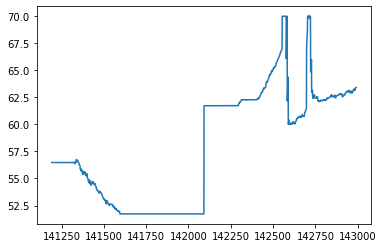

In [12]:
plt.plot(pred_data['Ai'])

<AxesSubplot:>

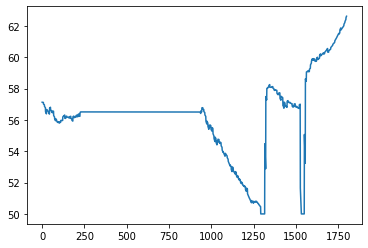

In [24]:
aa = pd.read_csv('../datasets_old/test/推料器手动指令.csv')
aa['推料器手动指令'][-1800:].plot()